# Introduction to SciPy

Based on numpy. Basically numpy plus more numerical and scientific methods and functions.

Big library, look at documentation to see all the available functions. 

We will look at some selected examples.

Numpy easier array creation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
[0] * 5

[0, 0, 0, 0, 0]

In [18]:
np.r_[0:10:5j, [0]*5]

array([ 0. ,  2.5,  5. ,  7.5, 10. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [65]:
np.c_[0:10:5j, [0]*5]

array([[ 0. ,  0. ],
       [ 2.5,  0. ],
       [ 5. ,  0. ],
       [ 7.5,  0. ],
       [10. ,  0. ]])

## FFT

- order of coefficients
- plotting

In [23]:
import matplotlib.pyplot as plt
from scipy import fftpack as fft

In [74]:
f = np.r_[5, 10] * 2 * np.pi
f

array([31.41592654, 62.83185307])

In [98]:
x = np.r_[0:2 * np.pi:800j]
y = 1.5 * np.sin(f[0] * x) + np.sin(f[1] * x)

In [99]:
fs = 1 / (x[1] - x[0])
fs

127.16479953042438

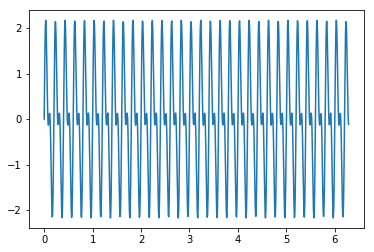

In [100]:
plt.plot(x, y);

In [106]:
yy = fft.fft(y)
xx = fft.fftfreq(yy.shape[0], 1 / fs)

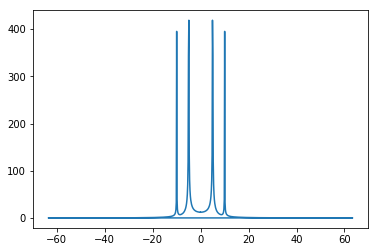

In [107]:
plt.plot(xx, np.abs(yy));

## Numerical integration

In [115]:
import matplotlib.pyplot as plt
from scipy import integrate as itg

In [111]:
help(itg)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on issues during integration
    
    Integrating functions, given fixed 

Let's integrate the sine function.

In [114]:
help(itg.quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [117]:
itg.quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
        In the call forms with ``xx``,  ``n`` is the length of the ``xx``
        array which contains ``xx[0] == x`` and the rest of the items are
        numbers contained in the ``ar

In [119]:
def sin(x, a, freq, phase):
    return a * np.sin(freq * x + phase)

In [126]:
sin_int = itg.quad(sin, 0, 2 * np.pi, args=(2.0, 0.5, 1.0))
sin_int

(4.322418446945117, 8.899489412381468e-14)

In [136]:
x, c = [0, 1, 2], ["a", "b", "c"]

for ii in range(len(x)):
    print(x[ii], c[ii])

print()
    
for X, C in zip(x, c):
    print(X, C)

print()

for ii, C in enumerate(c):
    print(ii, C)

print()

for ii, (X, C) in enumerate(zip(x,c)):
    print(ii, X, C)

0 a
1 b
2 c

0 a
1 b
2 c

0 a
1 b
2 c

0 0 a
1 1 b
2 2 c


In [145]:
def pol(x, c):
    return c[0] + c[1] * x + c[2] * x * x

In [147]:
pol(np.array([1.0, 3.0]), [1.0, 2.0, 3.0])

array([ 6., 34.])

In [156]:
c = [0.0, 1.0, -3.0]
c

[0.0, 1.0, -3.0]

In [157]:
itg.quad(pol, -1.0, 1.0, args=(c))

(-2.0, 2.258374703025784e-14)

In [158]:
poly1 = np.poly1d(c[::-1])
poly1

poly1d([-3.,  1.,  0.])

In [160]:
poly1.deriv()

poly1d([-6.,  1.])

In [163]:
poly1i = poly1.integ()
poly1i

poly1d([-1. ,  0.5,  0. ,  0. ])

In [164]:
poly1i(1.0) - poly1i(-1.0)

-2.0

## Optimization

Let's find the roots of polynom: $f(x) = 3.0 + x^3 - 2.5 x^5$

$f'(x) = 3x^2 - 12.5x^4 = 0$

$3 = 12.5x^2$

$x_{1,2} = \sqrt{0.24} = \pm 0.48989795$

$f''(x) = 6x - 50x^3 = g(x)$

In [7]:
from scipy.optimize import minimize, least_squares as lsq

In [166]:
#                  5     4    3    2    1    0
poly = np.poly1d([-2.5, 0.0, 1.0, 0.0, 0.0, 3.0])

In [168]:
poly.order

5

In [169]:
poly.integ()

poly1d([-0.41666667,  0.        ,  0.25      ,  0.        ,  0.        ,
        3.        ,  0.        ])

In [170]:
roots = poly.deriv().roots
roots

array([ 0.48989795, -0.48989795,  0.        ,  0.        ])

In [172]:
g = poly.deriv().deriv()
g

poly1d([-50.,   0.,   6.,   0.])

In [173]:
g(roots)

array([-2.93938769,  2.93938769,  0.        ,  0.        ])

In [179]:
x = np.r_[-2.0:2.0:100j]

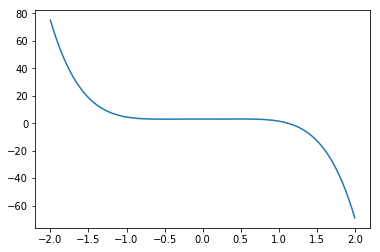

In [180]:
plt.plot(x, poly(x));

Let's do some plotting.

In [185]:
minimize(poly, -1.0, method="Nelder-Mead", options={"maxiter": 1e3, "disp": True})

Optimization terminated successfully.
         Current function value: 2.952970
         Iterations: 15
         Function evaluations: 30


 final_simplex: (array([[-0.48994141],
       [-0.48984375]]), array([2.9529698, 2.9529698]))
           fun: 2.9529697997145945
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([-0.48994141])

Sine fitting problem from last week. Let's solve it with `scipy.optimize.least_squares`:

- create callable function,
- create function for calculation of Jacobi-matrix,
- initial guess,
- compare different methods, loss functions.

In [28]:
def sin(params, x):
    return params[0] * np.sin(params[1] * x + params[2])

def sin_res(params, x, y):
    return sin(params, x) - y

In [29]:
params = [1.0, 2 * np.pi, 0.0]

x = np.r_[-2 * np.pi:2 * np.pi:500j]
y = sin(params, x) + 0.15 * np.random.randn(x.shape[0])

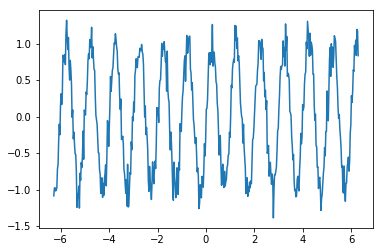

In [5]:
plt.plot(x, y);

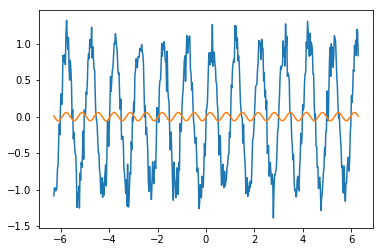

In [8]:
fit = lsq(sin_res, [1.0, 2 * np.pi * 1.5, 0.0], jac="2-point", args=(x, y), method="lm")

plt.plot(x, y, x, sin(fit.x, x));

$p_{ii} = \texttt{params[ii]}$

$f(x) = p_0 \sin(x p_1 + p_2)$

$\partial_{p_0} f(x) = \sin(x p_1 + p_2)$

$\partial_{p_1} f(x) = p_0 x \cos(x p_1 + p_2)$

$\partial_{p_2} f(x) = p_0 \cos(x p_1 + p_2)$

In [30]:
def jac(params, x, y):
    arg = x * params[1] + params[2]
    _cos = params[0] * np.cos(arg)
    
    return np.c_[np.sin(arg), x * _cos, _cos]

[-1.00840924  6.28216852 -9.42615624]


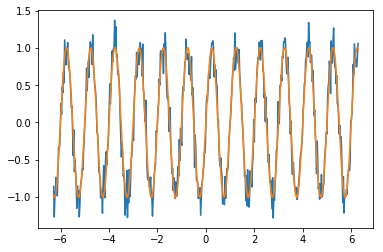

In [35]:
params_start = [1.0, 2 * np.pi * 1.0, -10.0]
fit = lsq(sin_res, params_start, jac=jac, args=(x, y), method="lm")

print(fit.x)
plt.plot(x, y, x, sin(fit.x, x));

In [188]:
help(lsq)

Help on function least_squares in module scipy.optimize._lsq.least_squares:

least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})
    Solve a nonlinear least-squares problem with bounds on the variables.
    
    Given the residuals f(x) (an m-dimensional real function of n real
    variables) and the loss function rho(s) (a scalar function), `least_squares`
    finds a local minimum of the cost function F(x)::
    
        minimize F(x) = 0.5 * sum(rho(f_i(x)**2), i = 0, ..., m - 1)
        subject to lb <= x <= ub
    
    The purpose of the loss function rho(s) is to reduce the influence of
    outliers on the solution.
    
    Parameters
    ----------
    fun : callable
        Function which computes the vector of residuals, with the signature
        ``fun(x, *args, **kwarg

## Interpolation

In [36]:
from scipy import interpolate as intp

### Nearest neighbour

- numpy `mgrid` - like Matlab `meshgrid`
- numpy `r_`, `c_` - quick array creation

In [38]:
help(np.mgrid)

Help on nd_grid in module numpy.lib.index_tricks object:

class nd_grid(builtins.object)
 |  nd_grid(sparse=False)
 |  
 |  Construct a multi-dimensional "meshgrid".
 |  
 |  ``grid = nd_grid()`` creates an instance which will return a mesh-grid
 |  when indexed.  The dimension and number of the output arrays are equal
 |  to the number of indexing dimensions.  If the step length is not a
 |  complex number, then the stop is not inclusive.
 |  
 |  However, if the step length is a **complex number** (e.g. 5j), then the
 |  integer part of its magnitude is interpreted as specifying the
 |  number of points to create between the start and stop values, where
 |  the stop value **is inclusive**.
 |  
 |  If instantiated with an argument of ``sparse=True``, the mesh-grid is
 |  open (or not fleshed out) so that only one-dimension of each returned
 |  argument is greater than 1.
 |  
 |  Parameters
 |  ----------
 |  sparse : bool, optional
 |      Whether the grid is sparse or not. Default 

In [55]:
y, x = np.mgrid[5:0:-1, 0:6]

In [56]:
print("x: \n", x, "\n", "y: \n", y)

x: 
 [[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]] 
 y: 
 [[5 5 5 5 5 5]
 [4 4 4 4 4 4]
 [3 3 3 3 3 3]
 [2 2 2 2 2 2]
 [1 1 1 1 1 1]]


### Scipy's `griddata`

In [57]:
help(intp.griddata)

Help on function griddata in module scipy.interpolate.ndgriddata:

griddata(points, values, xi, method='linear', fill_value=nan, rescale=False)
    Interpolate unstructured D-dimensional data.
    
    Parameters
    ----------
    points : ndarray of floats, shape (n, D)
        Data point coordinates. Can either be an array of
        shape (n, D), or a tuple of `ndim` arrays.
    values : ndarray of float or complex, shape (n,)
        Data values.
    xi : 2-D ndarray of float or tuple of 1-D array, shape (M, D)
        Points at which to interpolate data.
    method : {'linear', 'nearest', 'cubic'}, optional
        Method of interpolation. One of
    
        ``nearest``
          return the value at the data point closest to
          the point of interpolation.  See `NearestNDInterpolator` for
          more details.
    
        ``linear``
          tessellate the input point set to n-dimensional
          simplices, and interpolate linearly on each simplex.  See
          `Li

$$ f(x, y) =  \exp\left(-\frac{(x - \mu_x)^2}{\sigma_x} - \frac{(y - \mu_y)^2}{\sigma_y}\right) $$

In [94]:
def gauss(x, y, mean=(1.0, 2.0), sigma=(1.0,1.0)):
    return np.exp(-((x - mean[0])**2 / sigma[0] + (y - mean[1])**2 / sigma[1]))

In [97]:
y, x = np.mgrid[0:10:50j, 0:10:50j]
val = gauss(x, y, mean=(6.5, 5.0), sigma=(10.0,2.5))

In [83]:
left, right, bottom, top = x.min(), x.max(), y.min(), y.max()

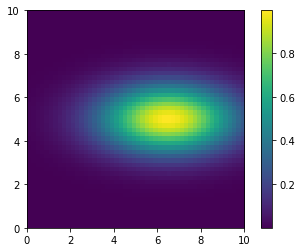

In [137]:
plt.imshow(val, extent=(left, right, bottom, top))
plt.colorbar()

In [118]:
xr, yr = 5.0 * np.random.randn(100), 5.0 * np.random.randn(100)

In [119]:
val1 = gauss(xr, yr, mean=(6.5, 5.0), sigma=(100.0,50.0))

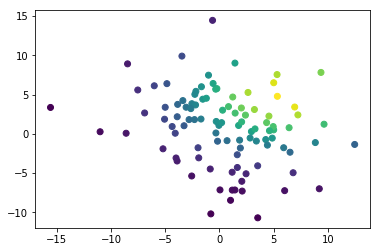

In [120]:
plt.scatter(xr, yr, c=val1)

In [123]:
xy = np.c_[xr, yr]

In [142]:
limits = (xr.min(), xr.max(), yr.min(), yr.max())

In [143]:
grid = np.mgrid[limits[0]:limits[1]:100j,limits[2]:limits[3]:100j]

In [144]:
xf, yf = grid[1].flatten(), grid[0].flatten()

In [145]:
interp = intp.griddata(xy, val1, (xf,yf), method="cubic")

In [147]:
interp.shape

(10000,)

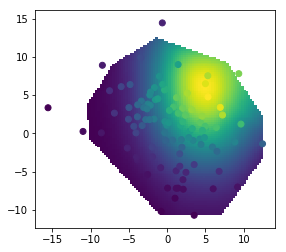

In [161]:
plt.imshow(np.rot90(interp.reshape(100,100)), extent=limits)
plt.scatter(xr, yr, c=val1)

In [ ]:
help(intp.)